## Prepare

In [36]:
import random
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

def generate_random_graph(n_nodes, avg_degree):
    nodes = list(range(n_nodes))
    edges = []

    # 必要なエッジ数を計算
    n_edges = int(n_nodes * avg_degree / 2)

    # ノードのペアを生成してエッジに追加
    while len(edges) < n_edges:
        u, v = random.sample(nodes, 2)
        if (u, v) not in edges and (v, u) not in edges and u != v:
            edges.append((u, v))

    print(f"Nodes: {n_nodes}, Edges: {len(edges)}")
    return nodes, edges

def draw_networkx(nodes, edges):
    # prepare
    G_nx = nx.Graph()
    G_nx.add_nodes_from(nodes)
    G_nx.add_edges_from(edges)
    pos = nx.kamada_kawai_layout(G_nx, seed=42)

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    nx.draw(G_nx, pos, node_size=10, width=0.5, with_labels=False, ax=ax)
    plt.axis("off")
    plt.show()

def draw_igraph(nodes, edges):
    # prepare
    G_ig = ig.Graph()
    G_ig.add_vertices(nodes)
    G_ig.add_edges(edges)
    pos = G_ig.layout("kk", seed=42)

    # plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ig.plot(G_ig, layout=pos, target=ax, vertex_size=5, edge_width=0.5, vertex_label=None)
    plt.axis("off")
    plt.show()

def measure_time(func, *args, **kwargs):
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"{func.__name__} execution time: {execution_time:.2f} seconds")

def main(n_nodes, avg_degree, only_igraph=False):
    # それぞれの時間を計測
    nodes, edges = generate_random_graph(n_nodes, avg_degree)
    if not only_igraph:
        measure_time(draw_networkx, nodes, edges)
    measure_time(draw_igraph, nodes, edges)


## degree = 2

Nodes: 10, Edges: 10


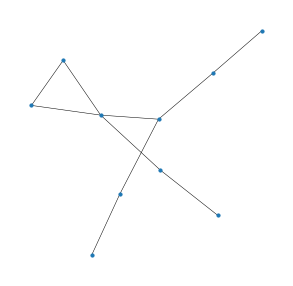

draw_networkx execution time: 0.04 seconds


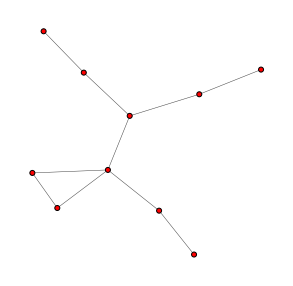

draw_igraph execution time: 0.12 seconds


In [38]:
main(10, 2)

Nodes: 100, Edges: 100


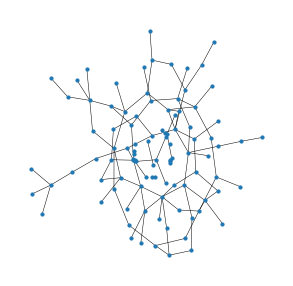

draw_networkx execution time: 0.09 seconds


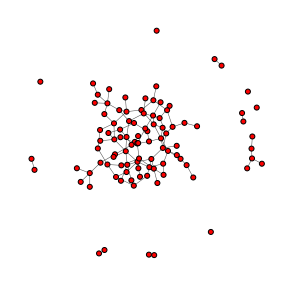

draw_igraph execution time: 0.98 seconds


In [39]:
main(100, 2)

Nodes: 1000, Edges: 1000


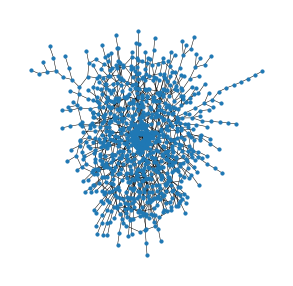

draw_networkx execution time: 10.27 seconds


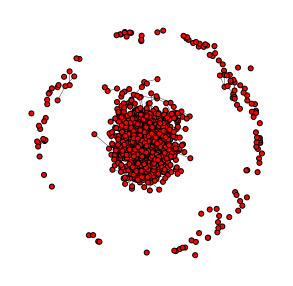

draw_igraph execution time: 9.65 seconds


In [40]:
main(1000, 2)

In [41]:
main(10000, 2)

Nodes: 10000, Edges: 10000


In [12]:
main(10, 2)

Nodes: 10, Edges: 10
Nodes: 100, Edges: 100
Nodes: 1000, Edges: 1000


In [ ]:
import matplotlib.pyplot as plt

def plot_results(n_nodes_list, networkx_times, igraph_times):
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(n_nodes_list, networkx_times, marker='o', label='NetworkX')
    ax.plot(n_nodes_list, igraph_times, marker='o', label='iGraph')

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Execution Time (seconds)')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend()
    ax.grid(True)

    fig.tight_layout()
    plt.show()

In [ ]:
n_nodes_list = [10, 100, 1000, 10000]
networkx_times = [0.001, 0.002, 0.004, 0.015]
igraph_times = [0.001, 0.001, 0.001, 0.001]
plot_results(n_nodes_list, networkx_times, igraph_times)

# old

## Prepare

In [2]:
# read (basic)
# path = "input/twitter/"
# df = pd.read_csv(f"{path}follow.csv", index_col=0).fillna('')

path = "output/csv/"
df_edges = pd.read_csv(f"{path}02_mutual_edges.csv")
df_nodes = pd.read_csv(f"{path}02_mutual_nodes.csv")
df_edges

,Source,Target
0,541345665,624214070
1,59367717,624214070
2,164109352,624214070
3,3307359877,624214070
4,624214070,912039145
...,...,...
1541494,2271399284,86987390
1541495,168066580,86987390
1541496,1222073991516409856,1236552414833987585
1541497,100387174,188716001


In [3]:
n_use = 30
use_nodes = df_nodes['Id'].tolist()[:n_use]
# use_nodes
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)
# df.to_csv(f"{path}03_mutual_edges_{n_use}.csv", index=False)
df

,Source,Target
0,1401335041,22273191
1,22273191,7288532
2,22273191,78646435
3,22273191,373928998
4,22273191,379382447
...,...,...
345,116374982,6092962
346,6092962,78646435
347,134841238,6092962
348,134841238,78646435


## Chutorial 1


### text

In [4]:
# 1.2 20p-
# https://github.com/Sasahara-Lab/FirstCourseNetworkScience/blob/master/tutorials_ja/Chapter%201%20Tutorial.ipynb

import networkx as nx
%matplotlib inline


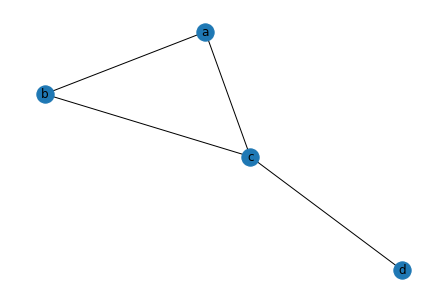

In [5]:
# 1.2 20p
# https://github.com/Sasahara-Lab/FirstCourseNetworkScience/blob/master/tutorials_ja/Chapter%201%20Tutorial.ipynb

import networkx as nx
%matplotlib inline

# 一般的なグラフはデフォルトで方向性をもたない
G = nx.Graph()


# それぞれのノードに名前（ここではアルファベットの）をつける
G.add_node('a')

# # add_nodes_from メソットはシーケンス（この場合はリスト）よりノードを加えることができる
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# ノード 'a' と 'b' の間にエッジを加える
# このグラフは無向グラフであるため，ノードの順序は無関係である
G.add_edge('a', 'b')

# # add_nodes_from　同様に，シーケンスからエッジを加えることもできる
# # エッジは 2 要素のタプルで指定される
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# グラフを描画する
nx.draw(G, with_labels=True)
# 実行のたびに場所が変わる

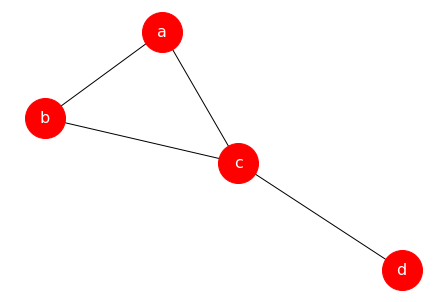

In [6]:
nx.draw(G,
        with_labels=True,
        node_color='red', #'blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

In [7]:
# 全てのノードを列挙する
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [8]:
# 全てのエッジを列挙する
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [9]:
for node in G.nodes:
    print(node)

a
b
c
d


In [10]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [11]:
print(G.number_of_nodes())
print(G.number_of_edges())

4
4


In [12]:
# ノード 'b' の近隣ノードのリスト
list(G.neighbors('b'))

['a', 'c']

In [13]:
# nx.is_tree(G)
nx.is_connected(G)

True

In [20]:
# G.nodes # NodeView(('a', 'b', 'c', 'd'))
# G.has_node('a')
# G.has_node('e')
"a" in G.nodes

True

In [21]:
# G.has_edge('a', 'd')
G.has_edge('a', 'b')
("a", "b") in G.edges

True

In [23]:
# len(list(G.neighbors('b')))
G.degree('b')

2

### try my data

In [24]:
df

,Source,Target
0,1401335041,22273191
1,22273191,7288532
2,22273191,78646435
3,22273191,373928998
4,22273191,379382447
...,...,...
345,116374982,6092962
346,6092962,78646435
347,134841238,6092962
348,134841238,78646435


In [25]:
G = nx.Graph()
G.add_nodes_from(df['Source'])
G.add_nodes_from(df['Target'])
len(G.nodes)

30

In [26]:
G.add_edges_from(df[['Source', 'Target']].values)
len(G.edges)

350

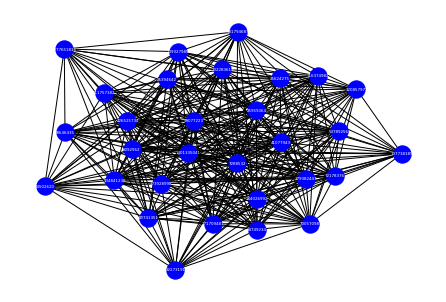

In [32]:
# nx.draw(G,
#         with_labels=True,
#         node_color='blue',
#         node_size=300,
#         font_color='white',
#         font_size=4,
#         )

### compare networkx and igraph

#### n = 100

In [77]:
n_use = 100
use_nodes = df_nodes['Id'].tolist()[:n_use]
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)

# node mapping
node_mapping = {node: i for i, node in enumerate(use_nodes)}
df['Source'] = df['Source'].map(node_mapping)
df['Target'] = df['Target'].map(node_mapping)

# prepare
nodes = set(df['Source'].tolist() + df['Target'].tolist())
edges = df[['Source', 'Target']].values
print(f"Nodes: {len(nodes)}, Edges: {len(edges)}")
df

Nodes: 100, Edges: 2693


,Source,Target
0,22,70
1,60,70
2,36,70
3,52,70
4,18,70
...,...,...
2688,61,9
2689,9,37
2690,61,37
2691,61,23


CPU times: user 75.1 ms, sys: 1.54 ms, total: 76.6 ms
Wall time: 77.3 ms


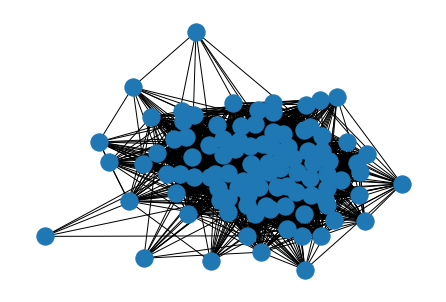

In [79]:
%%time

import networkx as nx
%matplotlib inline

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G)

In [90]:
!pip install pycairo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 6.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.26.0-cp39-cp39-macosx_10_9_x86_64.whl size=129068 sha256=187eb693a44a7023af532989f889a8223939e5d5c2dabaf0ce1c1ce487a04203
  Stored in directory: /Users/akito/Library/Caches/pip/wheels/91/e5/47/8d489718d63c88c6ca05ed6e3c0118324e3780c4d383d363bb
Successfully built pycairo
DEPRECATION: pytorch-lightning 1.6.1 has a non-standard dependency specifier torch>=1.8.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


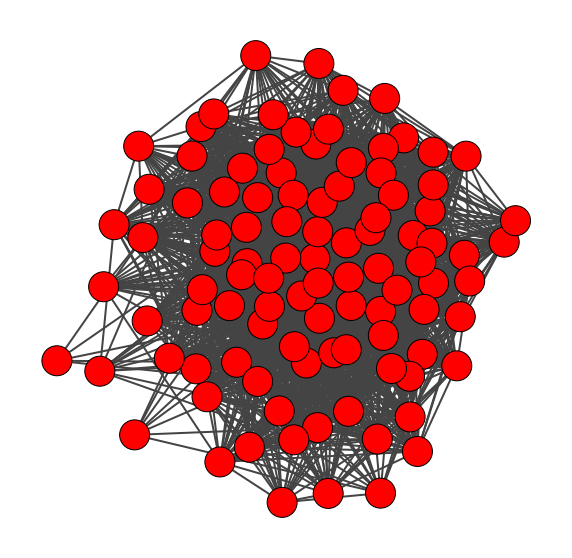

In [101]:
import igraph as ig
# import cairo
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ig.plot(G, layout=G.layout("kk"), target=ax)
# ig.plot(G, target=ax)
plt.show()



Nodes: 100, Edges: 2693


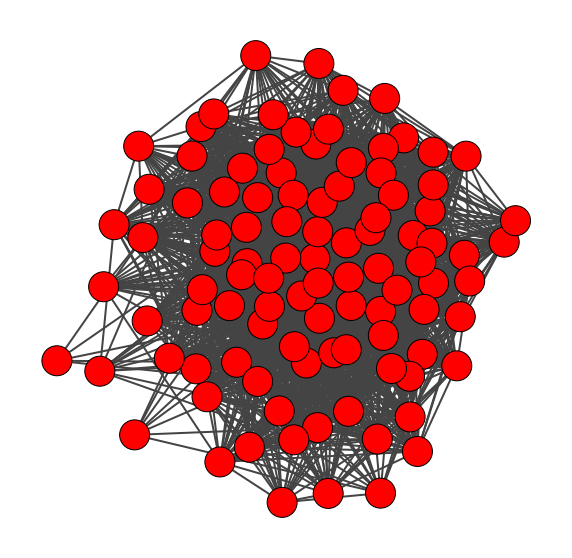

In [76]:

import pandas as pd


G = ig.Graph()

# ノードを追加
nodes = sorted(set(df['Source']).union(set(df['Target'])))
G.add_vertices(nodes)

# エッジを追加
edges = df[['Source', 'Target']].values.tolist()
G.add_edges(edges)

print(f"Nodes: {len(G.vs)}, Edges: {len(G.es)}")

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ig.plot(G, layout=G.layout("kk"), target=ax)
plt.show()


#### n = 1000

In [102]:
n_use = 1000
use_nodes = df_nodes['Id'].tolist()[:n_use]
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)

# node mapping
node_mapping = {node: i for i, node in enumerate(use_nodes)}
df['Source'] = df['Source'].map(node_mapping)
df['Target'] = df['Target'].map(node_mapping)

# prepare
nodes = set(df['Source'].tolist() + df['Target'].tolist())
edges = df[['Source', 'Target']].values
print(f"Nodes: {len(nodes)}, Edges: {len(edges)}")
df

Nodes: 1000, Edges: 83193


,Source,Target
0,936,160
1,573,160
2,527,160
3,160,535
4,321,160
...,...,...
83188,280,176
83189,107,731
83190,107,176
83191,107,805


CPU times: user 8.38 s, sys: 62.9 ms, total: 8.44 s
Wall time: 8.45 s


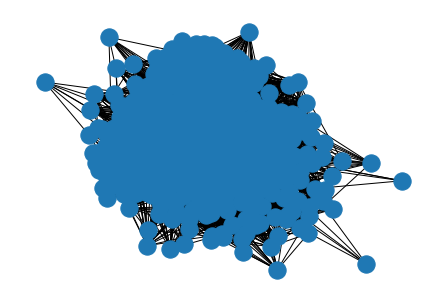

In [103]:
%%time

import networkx as nx
%matplotlib inline

G = nx.Graph()

G.add_nodes_from(nodes)
G.add_edges_from(edges)

nx.draw(G)

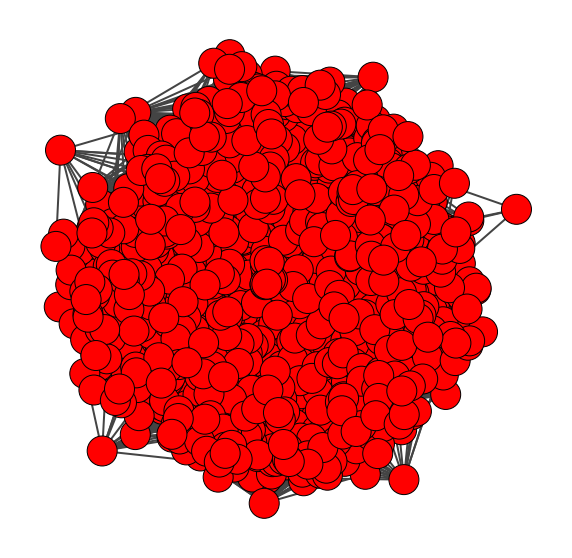

CPU times: user 34.7 s, sys: 592 ms, total: 35.3 s
Wall time: 33.8 s


In [104]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

f, ax = plt.subplots(1, 1)
ig.plot(G, layout=G.layout("kk"), target=ax)
plt.show()



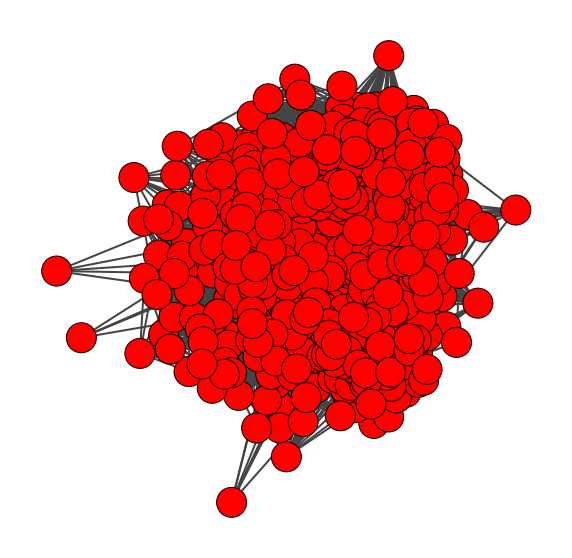

CPU times: user 35.3 s, sys: 598 ms, total: 35.9 s
Wall time: 34.6 s


In [105]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

f, ax = plt.subplots(1, 1)
ig.plot(G, layout=G.layout("fr"), target=ax)
plt.show()



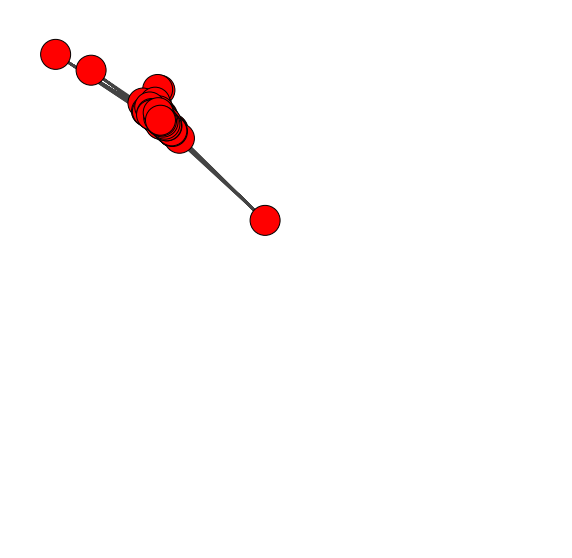

CPU times: user 36.1 s, sys: 590 ms, total: 36.7 s
Wall time: 35.3 s


In [106]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

f, ax = plt.subplots(1, 1)
ig.plot(G, layout=G.layout("lgl"), target=ax)
plt.show()



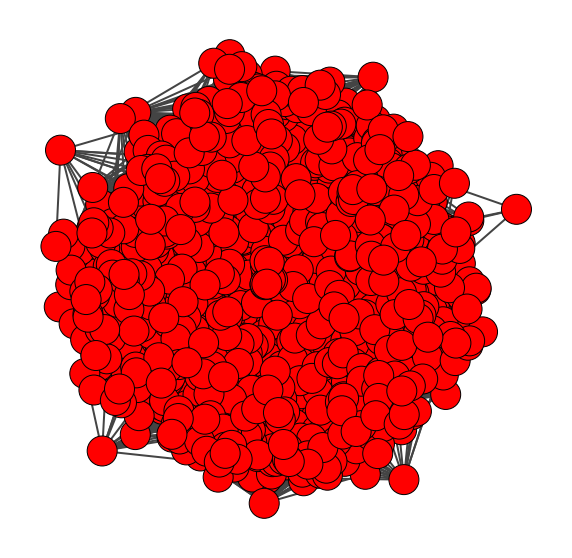

CPU times: user 35.4 s, sys: 576 ms, total: 36 s
Wall time: 34.6 s


In [107]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ig.plot(G, layout=G.layout("kk"), target=ax, parallel_edges=True)
plt.show()


#### n=300

In [109]:
n_use = 300
use_nodes = df_nodes['Id'].tolist()[:n_use]
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)

# node mapping
node_mapping = {node: i for i, node in enumerate(use_nodes)}
df['Source'] = df['Source'].map(node_mapping)
df['Target'] = df['Target'].map(node_mapping)

# prepare
nodes = set(df['Source'].tolist() + df['Target'].tolist())
edges = df[['Source', 'Target']].values
print(f"Nodes: {len(nodes)}, Edges: {len(edges)}")
df

Nodes: 300, Edges: 15364


,Source,Target
0,242,160
1,13,160
2,231,160
3,216,160
4,215,160
...,...,...
15359,280,114
15360,280,77
15361,107,280
15362,280,176


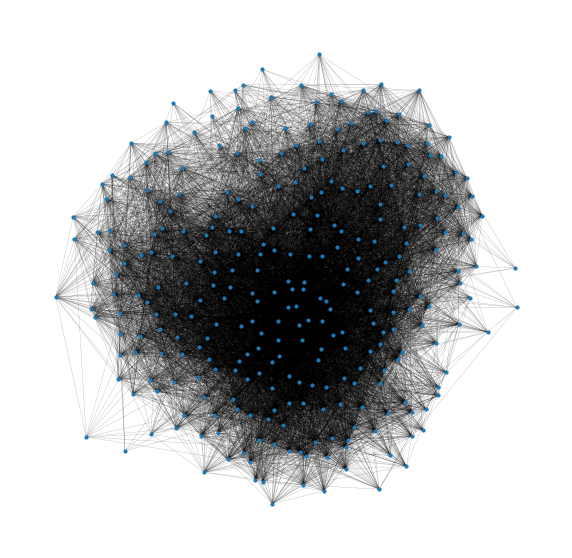

CPU times: user 8.06 s, sys: 1.79 s, total: 9.85 s
Wall time: 7.46 s


In [111]:
%%time
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.kamada_kawai_layout(G)  # Kamada-Kawaiレイアウトを使用

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=False, node_size=10, width=0.1, ax=ax)
plt.axis("off")
plt.show()

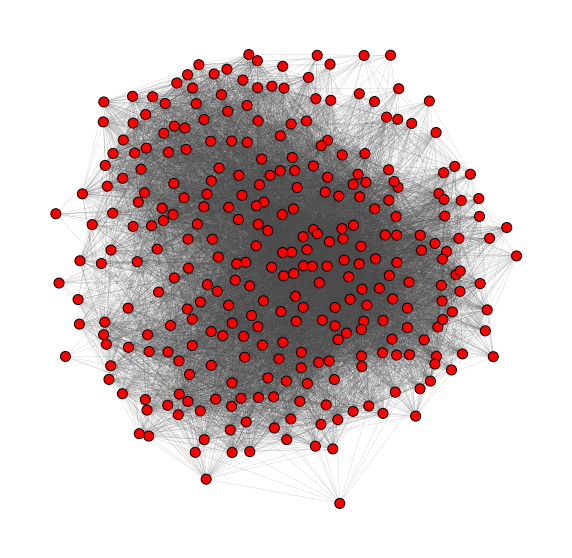

CPU times: user 8.78 s, sys: 356 ms, total: 9.13 s
Wall time: 7.63 s


In [112]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(G, layout=G.layout("kk"), target=ax, vertex_label=None, edge_width=0.1, vertex_size=10)
plt.axis("off")
plt.show()

#### n=1000 again

In [113]:
n_use = 1000
use_nodes = df_nodes['Id'].tolist()[:n_use]
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)

# node mapping
node_mapping = {node: i for i, node in enumerate(use_nodes)}
df['Source'] = df['Source'].map(node_mapping)
df['Target'] = df['Target'].map(node_mapping)

# prepare
nodes = set(df['Source'].tolist() + df['Target'].tolist())
edges = df[['Source', 'Target']].values
print(f"Nodes: {len(nodes)}, Edges: {len(edges)}")
df

Nodes: 1000, Edges: 83193


,Source,Target
0,936,160
1,573,160
2,527,160
3,160,535
4,321,160
...,...,...
83188,280,176
83189,107,731
83190,107,176
83191,107,805


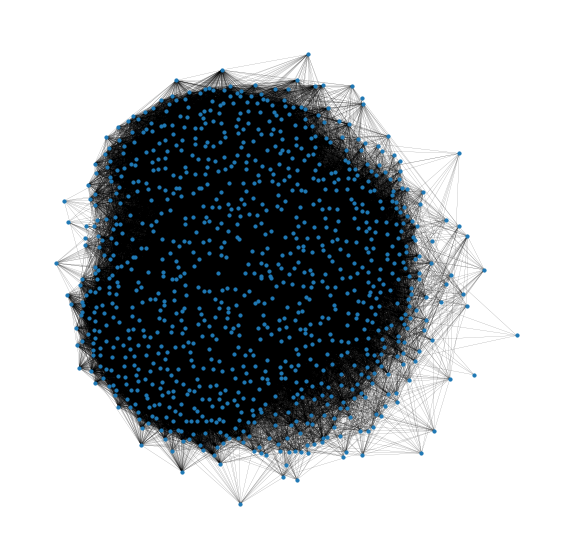

CPU times: user 2min 17s, sys: 1.08 s, total: 2min 18s
Wall time: 2min 18s


In [114]:
%%time
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.kamada_kawai_layout(G)  # Kamada-Kawaiレイアウトを使用

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=False, node_size=10, width=0.1, ax=ax)
plt.axis("off")
plt.show()

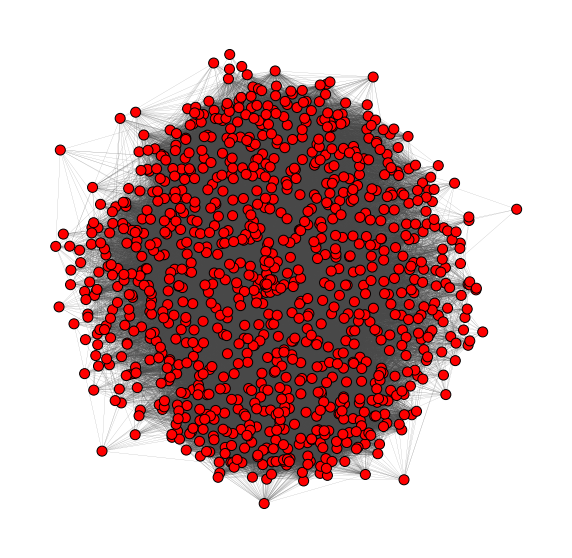

CPU times: user 36.2 s, sys: 578 ms, total: 36.7 s
Wall time: 35.5 s


In [115]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(G, layout=G.layout("kk"), target=ax, vertex_label=None, edge_width=0.1, vertex_size=10)
plt.axis("off")
plt.show()

#### n=10000 again

In [117]:
n_use = 10000
use_nodes = df_nodes['Id'].tolist()[:n_use]
df = df_edges[df_edges['Source'].isin(use_nodes) & df_edges['Target'].isin(use_nodes)]
df = df.reset_index(drop=True)

# node mapping
node_mapping = {node: i for i, node in enumerate(use_nodes)}
df['Source'] = df['Source'].map(node_mapping)
df['Target'] = df['Target'].map(node_mapping)

# prepare
nodes = set(df['Source'].tolist() + df['Target'].tolist())
edges = df[['Source', 'Target']].values
print(f"Nodes: {len(nodes)}, Edges: {len(edges)}")
df

Nodes: 10000, Edges: 665276


,Source,Target
0,9573,7088
1,9573,1088
2,2336,9573
3,9573,1
4,9573,6660
...,...,...
665271,77,4760
665272,4760,9158
665273,4310,3190
665274,4310,2418


In [120]:
%%time
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = nx.kamada_kawai_layout(G)  # Kamada-Kawaiレイアウトを使用

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=False, node_size=10, width=0.1, ax=ax)
plt.axis("off")
plt.show()

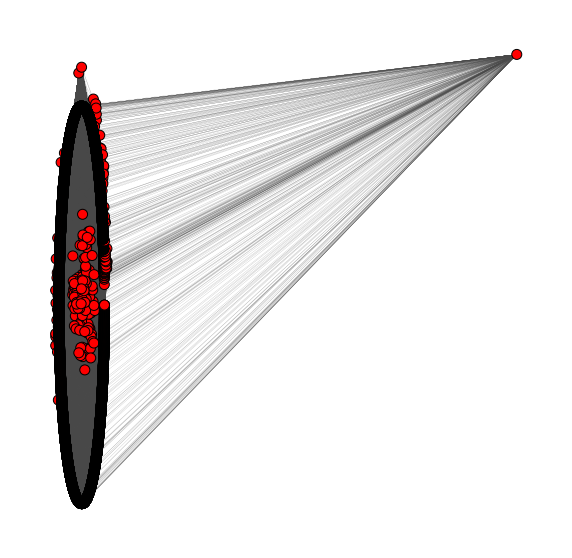

CPU times: user 7min 5s, sys: 5.66 s, total: 7min 10s
Wall time: 7min 10s


In [119]:
%%time
import igraph as ig
from matplotlib import pyplot as plt

G = ig.Graph()
G.add_vertices(nodes)
G.add_edges(edges)

fig, ax = plt.subplots(figsize=(10, 10))
pos = G.layout("kk")
ig.plot(G, layout=pos, target=ax, vertex_label=None, edge_width=0.1, vertex_size=10)
plt.axis("off")
plt.show()